# Handling Imbalanced Dataset

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [4]:
file_path = r'data\creditcard.csv'

In [5]:
df = pd.read_csv(file_path)
df.size

8829017

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

C:\Users\595244\Anaconda3\envs\krish_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

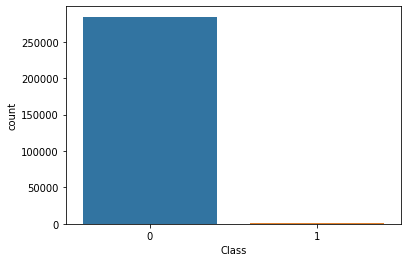

In [14]:
sns.countplot(df.Class)

In [15]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
X.shape, y.shape

((284807, 30), (284807,))

In [39]:
df.isnull().values.any()

False

In [17]:
count = pd.value_counts(df.Class, sort=True)
type(count)

pandas.core.series.Series

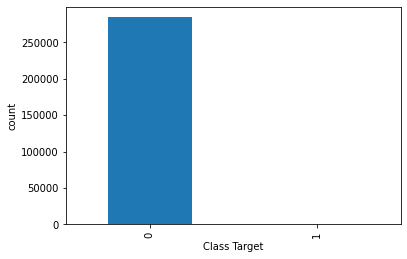

In [18]:
count.plot(kind='bar')
plt.xlabel('Class Target')
plt.ylabel('count')
plt.show()

In [20]:
fraud = df[df.Class == 1]
normal = df[df.Class == 0]
fraud.shape, normal.shape

((492, 31), (284315, 31))

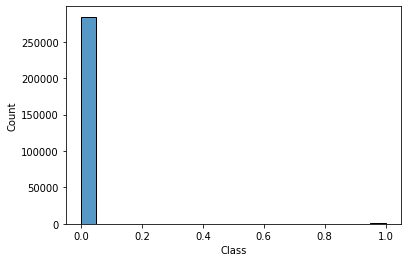

In [33]:
sns.histplot(df.Class)
plt.show()

## Under Sampling

In [ ]:
!pip install imblearn

In [26]:
from imblearn.under_sampling import NearMiss

In [29]:
nm  = NearMiss()

In [31]:
X_res, y_res = nm.fit_resample(X, y)

In [35]:
Counter(y)

Counter({0: 284315, 1: 492})

In [38]:
print('Beofre undersample y values are : ', Counter(y))
print('After undersample y values are : ', Counter(y_res))

Beofre undersample y values are :  Counter({0: 284315, 1: 492})
After undersample y values are :  Counter({0: 492, 1: 492})


## Oversampling using SMOTE

In [42]:
from imblearn.combine import SMOTETomek

In [ ]:
smk = SMOTETomek(random_state=42)
x_ups, y_ups = smk.fit_resample(X, y)

## Oversampling using RandomOverSampler

In [45]:
from imblearn.over_sampling import RandomOverSampler

In [48]:
os = RandomOverSampler(random_state=42)
x1, y1 = os.fit_resample(X, y)

In [49]:
x1.shape, y1.shape

((568630, 30), (568630,))

In [50]:
print('Initial Y count : ' , Counter(y))
print('After over sampling : ', Counter(y1))

Initial Y count :  Counter({0: 284315, 1: 492})
After over sampling :  Counter({0: 284315, 1: 284315})
